<h3>Importing the Libraries</h3>

In [121]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [122]:
#Reading the data set
data=pd.read_csv('Dataset/Bengaluru_House.csv')
data.sample(5)

area_type   availability        location   size  society  \
2617  Super built-up  Area         19-Dec          Hebbal  4 BHK  SNontle   
1429  Super built-up  Area  Ready To Move       Yelahanka  3 BHK  PuziaVe   
7449  Super built-up  Area  Ready To Move  Bharathi Nagar  2 BHK  FoapeWa   
4183  Super built-up  Area  Ready To Move     Basavangudi  3 BHK  Shntsad   
9328  Super built-up  Area  Ready To Move      Begur Road  2 BHK  Dhalsh    

     total_sqft  bath  balcony  price  
2617       3067   4.0      3.0  230.0  
1429       1614   3.0      2.0   95.0  
7449       1351   2.0      2.0   74.0  
4183       2300   3.0      NaN  317.0  
9328       1200   2.0      2.0   42.0

In [123]:
#Checking the data types of each columns
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [125]:
#checking the counts of each values in each column
for col in data.columns:
    print(data[col].value_counts())
    print("----------------------------------")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-------

In [126]:
#checking the null values in the data set
data.isnull().sum().sum()

6201

In [127]:
#null values in each column
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [128]:
#droping the row that has a null value 
data.dropna(subset=['location'],inplace=True)

In [129]:
data.duplicated().sum()

529

In [130]:
data.drop_duplicates(inplace=True)

<h4>Size</h4>

In [131]:
##preprocessing column size 
data['BHK']=data['size'].str.extract('(\d+)')

In [132]:
data['BHK']=pd.to_numeric(data['BHK'],errors='coerce')

In [133]:
#checkimg the null values in the column BHK
data['BHK'].isnull().sum().sum()

16

In [134]:
data['BHK'].fillna(data['BHK'].median(),inplace=True) #filling the missing values with median value

<h4>balcony</h4>

In [135]:
#checking the null values in column balcony
data['balcony'].isnull().sum()

605

around 5 % of the data is missing in the column balcony

In [136]:
data['balcony'].fillna(data['balcony'].median(),inplace=True)

In [137]:
data['balcony'].isnull().sum()

0

<h4>bath</h4>

In [138]:
data['bath'].isnull().sum()

73

In [139]:
data['bath'].fillna(data['bath'].median(),inplace=True)

<h4>total_sqft</h4>

In [140]:
def to_sqft(x):
    # Handle ranges (e.g., "4000 - 5249")
    if '-' in x:
        token = x.split('-')
        if len(token) == 2:
            return (float(token[0].strip()) + float(token[1].strip())) / 2

    # Handle Sq. Yards to Sq. Feet
    if "Sq. Yards" in x:
        return float(x.split("Sq. Yards")[0].strip()) * 9

    # Handle Sq. Meter to Sq. Feet
    if "Sq. Meter" in x:
        return float(x.split("Sq. Meter")[0].strip()) * 10.7639

    # Handle Perch to Sq. Feet
    if "Perch" in x:
        return float(x.split("Perch")[0].strip()) * 272.25

    # Handle Grounds to Sq. Feet
    if "Grounds" in x:
        return float(x.split("Grounds")[0].strip()) * 2400

    # Handle Acres to Sq. Feet
    if "Acres" in x:
        return float(x.split("Acres")[0].strip()) * 43560

    # Handle Cents to Sq. Feet
    if "Cents" in x:
        return float(x.split("Cents")[0].strip()) * 435.6

    # Handle Guntha to Sq. Feet
    if "Guntha" in x:
        return float(x.split("Guntha")[0].strip()) * 1089

    # Handle standalone numeric values
    try:
        return float(x)
    except ValueError:
        return None  # For invalid or unknown formats

In [141]:
data['total_sqft']=data['total_sqft'].apply(to_sqft)

<h4>location</h4>

In [142]:
unique_loc=data['location'].unique()#checkking the unique values of colum location 
len(unique_loc)

1305

In [143]:
data['location']=data['location'].str.lower()#converting all the values of column location to lowercase 

In [144]:
data.sample()

area_type   availability            location   size society  \
10913  Super built-up  Area  Ready To Move  3rd phase jp nagar  3 BHK     NaN   

       total_sqft  bath  balcony  price  BHK  
10913      2400.0   3.0      1.0  270.0  3.0

In [145]:
len(data['location'].unique()) #the difference before converting to lower case and after converting 1304-1294

1295

In [146]:
#removing the white spaces between the words in a value
data['location']=data['location'].apply(lambda x:x.strip())

In [147]:
value_loc=data['location'].value_counts()

In [148]:
value_loc

location
whitefield                            524
sarjapur  road                        379
electronic city                       289
kanakpura road                        249
thanisandra                           232
                                     ... 
kengeri satellite town ( bda site)      1
nagarbhavi  bda complex                 1
rajanna layout                          1
brigade road                            1
abshot layout                           1
Name: count, Length: 1283, dtype: int64

In [149]:
#in order to reduce the dimention i grouped the cities with occurance <=10 to one value 
cities_less_10=value_loc[value_loc<=10]

In [150]:
cities_less_10

location
nagappa reddy layout                  10
btm 1st stage                         10
sadashiva nagar                       10
kalkere                               10
beml layout                           10
                                      ..
kengeri satellite town ( bda site)     1
nagarbhavi  bda complex                1
rajanna layout                         1
brigade road                           1
abshot layout                          1
Name: count, Length: 1050, dtype: int64

In [151]:
data['location']=data['location'].apply(lambda x: 'other' if x in cities_less_10 else x)

In [152]:
data['location'].nunique()

234

<h4>new column price_per_sqft'</h4>

In [153]:
#The price is in terms of lakhs to caluclate the amount per sqr feet 
data['price_per_sqft']=((data['price']*100000)/(data['total_sqft']))
data['price_per_sqft']=pd.to_numeric(data['price_per_sqft'],errors='coerce')
data.head(2)

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  electronic city phase ii      2 BHK   
1            Plot  Area  Ready To Move          chikka tirupathi  4 Bedroom   

   society  total_sqft  bath  balcony   price  BHK  price_per_sqft  
0  Coomee       1056.0   2.0      1.0   39.07  2.0     3699.810606  
1  Theanmp      2600.0   5.0      3.0  120.00  4.0     4615.384615

In [154]:
#Removing outliers
def Outlier_price(data,column):
    sorted_data=data.sort_values(by=column)
    Q1=sorted_data[column].quantile(0.25)
    Q3=sorted_data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    data_no_out=sorted_data[(sorted_data[column]>lower_limit)&(sorted_data[column]<upper_limit)]
    return data_no_out

In [155]:
data1=Outlier_price(data,'price_per_sqft')

In [156]:
data1.shape

(11583, 11)

<h3>Before and after removing the outliers in column price_per_sqft</h3>

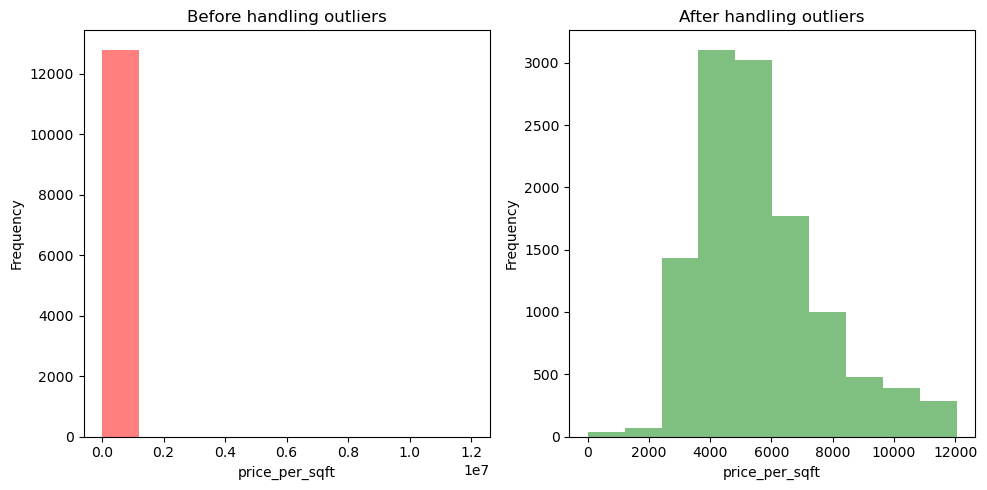

In [157]:
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for 'data'
data['price_per_sqft'].plot.hist(color='r', ax=ax[0], alpha=0.5)
data1['price_per_sqft'].plot.hist(color='g', ax=ax[1], alpha=0.5)

# Setting titles and labels
ax[0].set_title('Before handling outliers')
ax[0].set_xlabel('price_per_sqft')
ax[0].set_ylabel('Frequency')

ax[1].set_title('After handling outliers')
ax[1].set_xlabel('price_per_sqft')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [158]:
data1.shape

(11583, 11)

<Axes: xlabel='BHK', ylabel='price'>

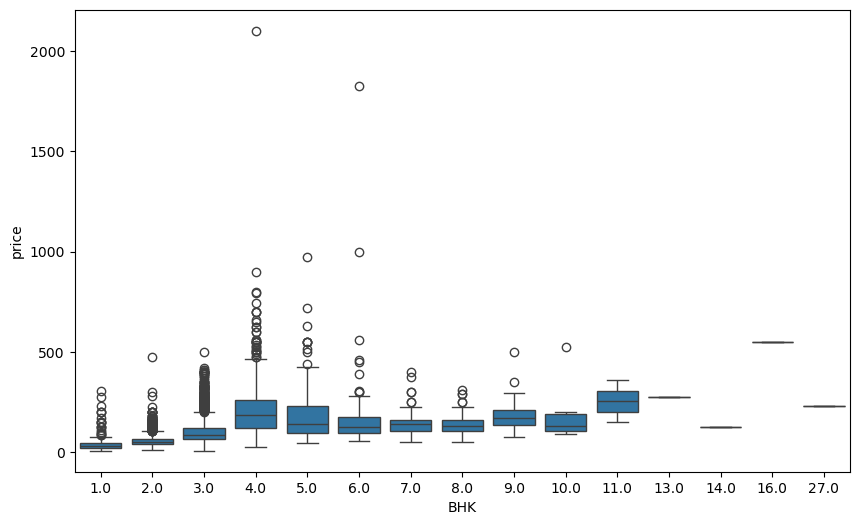

In [159]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(x='BHK',y='price',data=data1)

In [160]:
data1=data1[data1.bath<data1.BHK+3]
data1.shape[0]

11577

In [161]:
data1.isnull().sum()

area_type            0
availability         0
location             0
size                15
society           4379
total_sqft           0
bath                 0
balcony              0
price                0
BHK                  0
price_per_sqft       0
dtype: int64

In [162]:
data1[(data1['total_sqft']/data1['BHK'])<350]

area_type   availability                location  \
8653             Plot  Area  Ready To Move           doddaballapur   
11173  Super built-up  Area  Ready To Move                   other   
2796         Built-up  Area  Ready To Move         electronic city   
7028   Super built-up  Area  Ready To Move                   other   
4786   Super built-up  Area  Ready To Move         electronic city   
...                     ...            ...                     ...   
11506            Plot  Area  Ready To Move      kumaraswami layout   
1735             Plot  Area  Ready To Move                   other   
9172         Built-up  Area  Ready To Move  banashankari stage iii   
7087             Plot  Area  Ready To Move      vishwapriya layout   
11234            Plot  Area  Ready To Move      kumaraswami layout   

             size  society  total_sqft  bath  balcony  price   BHK  \
8653    2 Bedroom      NaN       640.0   1.0      0.0   10.5   2.0   
11173       2 BHK  Jahipa        675.0   2.0      2.0   13.5   2.0   
2796        3 BHK  Itelaa        880.0   2.0      1.0   18.0   3.0   
7028        2 BHK  Jahipa        675.0   1.0      1.0   15.0   2.0   
4786        2 BHK  Itelaa        660.0   1.0      1.0   15.0   2.0   
...           ...      ...         ...   ...      ...    ...   ...   
11506   4 Bedroom  BaisePa       600.0   2.0      1.0   72.0   4.0   
1735   10 Bedroom      NaN       750.0  10.0      2.0   90.0  10.0   
9172    3 Bedroom      NaN      1000.0   2.0      1.0  120.0   3.0   
7087    5 Bedroom      NaN       690.0   4.0      1.0   83.0   5.0   
11234   4 Bedroom      NaN       623.0   4.0      1.0   75.0   4.0   

       price_per_sqft  
8653      1640.625000  
11173     2000.000000  
2796      2045.454545  
7028      2222.222222  
4786      2272.727273  
...               ...  
11506    12000.000000  
1735     12000.000000  
9172     12000.000000  
7087     12028.985507  
11234    12038.523274  

[569 rows x 11 columns]

In [163]:
data1=data1[(data1['total_sqft']/data1['BHK'])>=350]

<h2>Handling the outliers in the column BHK</h2>

In [164]:
def Scatter_BHK(df,location):
    df_bhk2=df[(df.location==location)&(df.BHK==2)]
    df_bhk3=df[(df.location==location)&(df.BHK==3)]
    fig=plt.figure(figsize=(8,3))
    plt.scatter(df_bhk2.total_sqft,df_bhk2.price,color='y',s=50,label='2 BHK')
    plt.scatter(df_bhk3.total_sqft,df_bhk3.price,marker='X',color='g',s=50,label='3 BHK')
    plt.xlabel('Total square foot ')
    plt.ylabel('Price(in lakhs(ind rupees))')
    plt.title(location)
    plt.legend()
    plt.show()
    

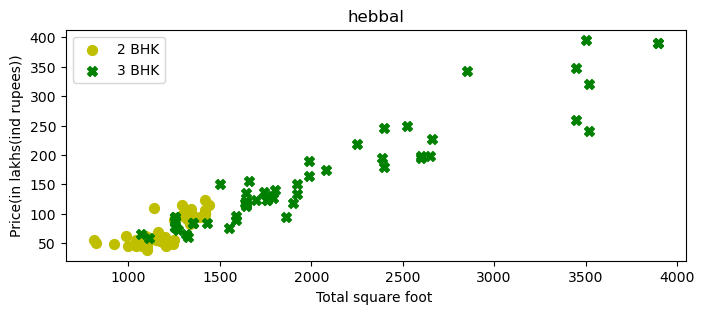

In [165]:
Scatter_BHK(data1,'hebbal')

In [166]:
Scatter_BHK(data1,'electronic city phase ii')

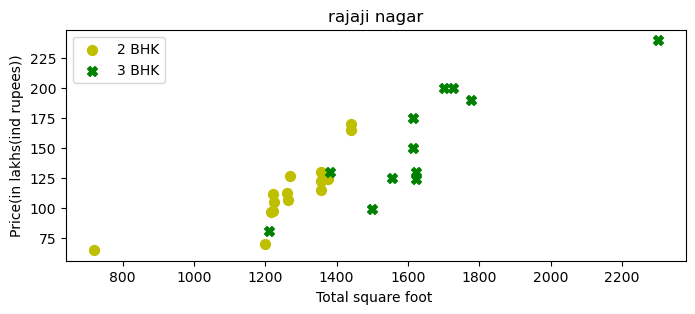

In [167]:
Scatter_BHK(data1,'rajaji nagar')

In [168]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [169]:
data2=remove_bhk_outliers(data1)
print('before:',data1.shape[0])
print('after:',data2.shape[0])

before: 11008
after: 7938


In [170]:
Scatter_BHK(data2,'hebbal')

In [171]:
Scatter_BHK(data2,'electronic city phase ii')

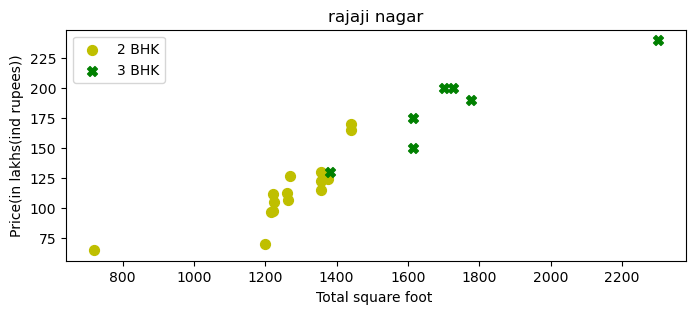

In [172]:
Scatter_BHK(data2,'rajaji nagar')

In [173]:
data2.drop(columns=['area_type','availability','size','society','price_per_sqft'],axis=1,inplace=True)

In [174]:
X=data2.drop(columns=['price'],axis=1)
y=data2['price']

In [175]:
X.head(3)

location  total_sqft  bath  balcony  BHK
648            arekere  1123031.25   9.0      2.0  9.0
7607      bommenahalli   653400.00   3.0      1.0  3.0
7001  thyagaraja nagar   653400.00   6.0      2.0  8.0

In [176]:
y.head(3)

648     265.0
7607    217.0
7001    290.0
Name: price, dtype: float64

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=10)

In [178]:
X_train.shape

(4762, 5)

In [179]:
X_test.shape

(3176, 5)

In [180]:
train_data = pd.concat([X_train, y_train], axis=1)

In [181]:
train_data.sample()

location  total_sqft  bath  balcony  BHK  price
10952  munnekollal      1200.0   2.0      2.0  2.0   40.0

In [182]:
#train_data.to_csv('train_data.csv', index=False)

In [183]:
test_data = pd.concat([X_test, y_test], axis=1)

In [184]:
test_data.sample()

location  total_sqft  bath  balcony  BHK  price
6855  horamavu banaswadi      1156.0   2.0      2.0  2.0   46.9

In [185]:
test_data.to_csv('test_data.csv', index=False)